<a href="https://colab.research.google.com/github/JNii90/ML-project/blob/main/Customer_Segmentation%2C_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_excel('/content/Global Super Store 2.xlsx')

pd.set_option('display.max_columns', None)


df.head()

,Row ID,Order ID,Order date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Product Name,Sub-Category,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,24599,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,FUR-BO-4861,"Ikea Library with Doors, Mobile",Bookcases,Furniture,731.82,2,0.0,102.42,39.66,Medium
1,29465,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,OFF-SU-2988,"Acme Scissors, Easy Grip",Supplies,Office Supplies,243.54,9,0.0,104.49,18.72,Medium
2,24598,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,TEC-MA-4211,"Epson Receipt Printer, White",Machines,Technology,346.32,3,0.0,13.77,14.10,Medium
3,24597,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,FUR-FU-5726,"Rubbermaid Door Stop, Erganomic",Furnishings,Furniture,169.68,4,0.0,79.68,11.01,Medium
4,29464,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,OFF-EN-3664,"Cameo Interoffice Envelope, with clear poly wi...",Envelopes,Office Supplies,203.88,4,0.0,24.36,5.72,Medium


In [ ]:
df.shape

(53082, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53082 entries, 0 to 53081
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          53082 non-null  int64         
 1   Order ID        53082 non-null  object        
 2   Order date      53082 non-null  datetime64[ns]
 3   Ship Date       53082 non-null  datetime64[ns]
 4   Ship Mode       53082 non-null  object        
 5   Customer ID     53082 non-null  object        
 6   Customer Name   53082 non-null  object        
 7   Segment         53082 non-null  object        
 8   Postal Code     11232 non-null  float64       
 9   City            53082 non-null  object        
 10  State           53082 non-null  object        
 11  Country         53082 non-null  object        
 12  Region          53082 non-null  object        
 13  Market          53082 non-null  object        
 14  Product ID      53082 non-null  object        
 15  Pr

In [ ]:
df.isnull().sum()

Row ID                0
Order ID              0
Order date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Postal Code       41850
City                  0
State                 0
Country               0
Region                0
Market                0
Product ID            0
Product Name          0
Sub-Category          0
Category              0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [ ]:
df[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']].describe()


,Sales,Quantity,Discount,Profit,Shipping Cost
count,53082.000000,53082.000000,53082.000000,53082.000000,53082.000000
mean,246.731226,3.488150,0.141245,29.209549,26.509968
std,487.283080,2.278003,0.210739,173.634838,57.373208
min,0.444000,1.000000,0.000000,-6599.978000,1.002000
25%,30.564000,2.000000,0.000000,0.000000,2.600000
50%,85.050000,3.000000,0.000000,9.360000,7.790000
75%,251.700000,5.000000,0.200000,36.960000,24.553750
max,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [ ]:
# Explore categorical variables

df['Segment'].value_counts()

Consumer       27386
Corporate      16018
Home Office     9678
Name: Segment, dtype: int64

In [ ]:
df['Ship Mode'].value_counts()

Standard Class    31818
Second Class      10714
First Class        7759
Same Day           2791
Name: Ship Mode, dtype: int64

In [ ]:
#Total sales
df['Sales'].sum()

13096986.92438

In [ ]:
#total Profit
df['Profit'].sum()

1550501.27588

In [ ]:
#which product segment had the hightest sales
df.groupby(['Segment'])['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)


,Segment,Sales
0,Consumer,6.722053e+06
1,Corporate,3.972949e+06
2,Home Office,2.401985e+06


In [ ]:
#which country had the hightest sales
top_10_sales = df.groupby(['Country'])['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False).head(10)

top_10_sales


,Country,Sales
156,United States,2.576229e+06
6,Australia,9.252359e+05
50,France,8.589311e+05
155,United Kingdom,7.040329e+05
30,China,7.005620e+05
54,Germany,6.281362e+05
94,Mexico,6.215526e+05
66,India,5.894860e+05
67,Indonesia,4.048875e+05
20,Brazil,3.599249e+05


In [ ]:
Category_sales = df.groupby(['Category'])['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

Category_sales

,Category,Sales
2,Technology,4.918059e+06
0,Furniture,4.247193e+06
1,Office Supplies,3.931734e+06


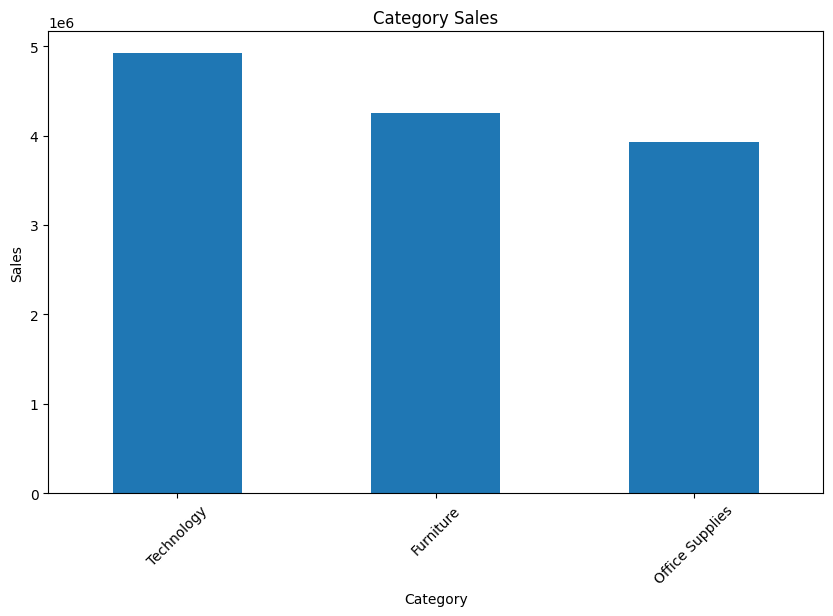

In [ ]:
Category_sales.plot(kind='bar', x='Category', y='Sales', figsize=(10, 6), legend=None)
plt.title('Category Sales')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.groupby(['Sub-Category'])['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

,Sub-Category,Sales
13,Phones,1.772126e+06
6,Copiers,1.547520e+06
5,Chairs,1.546397e+06
4,Bookcases,1.499628e+06
14,Storage,1.175741e+06
1,Appliances,1.045688e+06
11,Machines,8.156608e+05
16,Tables,8.011371e+05
0,Accessories,7.827527e+05
3,Binders,4.828427e+05


In [ ]:
df['Year'] = df['Order date'].dt.year

df.head()

,Row ID,Order ID,Order date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Product Name,Sub-Category,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year
0,24599,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,FUR-BO-4861,"Ikea Library with Doors, Mobile",Bookcases,Furniture,731.82,2,0.0,102.42,39.66,Medium,2017
1,29465,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,OFF-SU-2988,"Acme Scissors, Easy Grip",Supplies,Office Supplies,243.54,9,0.0,104.49,18.72,Medium,2015
2,24598,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,TEC-MA-4211,"Epson Receipt Printer, White",Machines,Technology,346.32,3,0.0,13.77,14.10,Medium,2017
3,24597,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,FUR-FU-5726,"Rubbermaid Door Stop, Erganomic",Furnishings,Furniture,169.68,4,0.0,79.68,11.01,Medium,2017
4,29464,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,OFF-EN-3664,"Cameo Interoffice Envelope, with clear poly wi...",Envelopes,Office Supplies,203.88,4,0.0,24.36,5.72,Medium,2015


In [ ]:

# Assuming df is your DataFrame containing 'Year', 'Sales', and 'Profit' columns
yearly_data = df.groupby('Year').agg({'Sales': 'sum', 'Profit': 'sum'})

year_with_highest_sales = yearly_data['Sales'].idxmax()
sales_highest = yearly_data.loc[year_with_highest_sales, 'Sales']

year_with_highest_profit = yearly_data['Profit'].idxmax()
profit_highest = yearly_data.loc[year_with_highest_profit, 'Profit']

print("Year with the highest sales:", year_with_highest_sales)
print("Sales in that year:", sales_highest)

print("Year with the highest profit:", year_with_highest_profit)
print("Profit in that year:", profit_highest)



Year with the highest sales: 2017
Sales in that year: 4299865.87056
Year with the highest profit: 2017
Profit in that year: 504165.97046


In [ ]:
df['Year'].unique()

array([2017, 2015, 2016, 2014, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
       2025])

In [ ]:
import pandas as pd

# Assuming df is your DataFrame containing 'Year', 'Sales', and 'Profit' columns
yearly_sales_profit = df.groupby('Year').agg({'Sales': 'sum', 'Profit': 'sum'})

yearly_sales_profit


,Sales,Profit
Year,,
2014,2.259451e+06,248940.81154
2015,2.677439e+06,307415.27910
2016,3.405746e+06,406935.23018
2017,4.299866e+06,504165.97046
2018,6.643133e+04,12437.83280
2019,5.878744e+04,8597.71090
2020,5.321296e+04,9650.51400
2021,6.678715e+04,15232.15610
2022,6.308968e+04,11054.47930


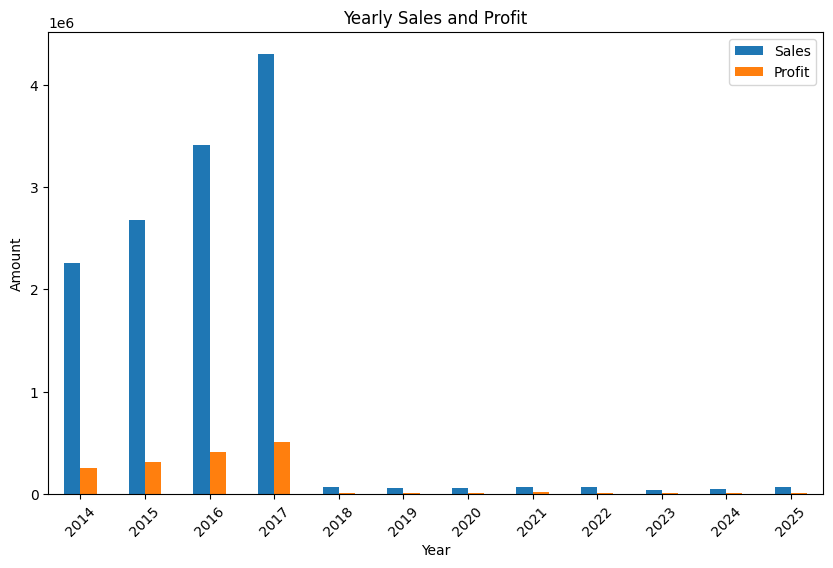

In [ ]:
yearly_sales_profit.plot(kind='bar', figsize=(10, 6))
plt.title('Yearly Sales and Profit')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend(['Sales', 'Profit'])
plt.show()

In [ ]:
# Analyze the relationship between variables
df.corr()


<ipython-input-21-ba35dbf3d093>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost,Year
Row ID,1.000000,0.012268,-0.044783,-0.166805,0.086544,-0.020052,-0.038794,0.032613
Postal Code,0.012268,1.000000,-0.023503,0.013509,0.035402,-0.027508,-0.021491,0.248129
Sales,-0.044783,-0.023503,1.000000,0.313664,-0.084887,0.491816,0.770692,-0.002040
Quantity,-0.166805,0.013509,0.313664,1.000000,-0.020104,0.107183,0.271669,0.014152
Discount,0.086544,0.035402,-0.084887,-0.020104,1.000000,-0.314861,-0.075966,-0.032296
Profit,-0.020052,-0.027508,0.491816,0.107183,-0.314861,1.000000,0.362498,0.013292
Shipping Cost,-0.038794,-0.021491,0.770692,0.271669,-0.075966,0.362498,1.000000,-0.002019
Year,0.032613,0.248129,-0.002040,0.014152,-0.032296,0.013292,-0.002019,1.000000


In [ ]:

# Now filtered_df contains rows where the 'Year' column is not 2024 or 2025

df0 = df[(df['Year'] != 2024) & (df['Year'] != 2025)]

df0.head()



,Row ID,Order ID,Order date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Product Name,Sub-Category,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year
0,24599,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,FUR-BO-4861,"Ikea Library with Doors, Mobile",Bookcases,Furniture,731.82,2,0.0,102.42,39.66,Medium,2017
1,29465,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,OFF-SU-2988,"Acme Scissors, Easy Grip",Supplies,Office Supplies,243.54,9,0.0,104.49,18.72,Medium,2015
2,24598,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,TEC-MA-4211,"Epson Receipt Printer, White",Machines,Technology,346.32,3,0.0,13.77,14.10,Medium,2017
3,24597,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,FUR-FU-5726,"Rubbermaid Door Stop, Erganomic",Furnishings,Furniture,169.68,4,0.0,79.68,11.01,Medium,2017
4,29464,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,OFF-EN-3664,"Cameo Interoffice Envelope, with clear poly wi...",Envelopes,Office Supplies,203.88,4,0.0,24.36,5.72,Medium,2015


In [ ]:
df0.shape

(52634, 25)

In [ ]:
country_counts = df['Country'].value_counts()
country_with_highest_entry = country_counts.idxmax()
highest_entry_count = country_counts.max()

print("Country with the highest entry count:", country_with_highest_entry)
print("Number of entries in that country:", highest_entry_count)


Country with the highest entry count: United States
Number of entries in that country: 11232


In [ ]:
df['Country'].value_counts()

United States     11232
Australia          2837
France             2827
Mexico             2635
United Kingdom     2187
                  ...  
Bhutan                1
Kuwait                1
Suriname              1
Malawi                1
The Gambia            1
Name: Country, Length: 165, dtype: int64

In [ ]:
df0.drop(columns=['Row ID','Country','Order ID','Order date','Ship Date','Postal Code','City','State','Region','Market','Product Name','Sub-Category','Category'], inplace=True)

df0.head()

<ipython-input-26-8371eb0006f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0.drop(columns=['Row ID','Country','Order ID','Order date','Ship Date','Postal Code','City','State','Region','Market','Product Name','Sub-Category','Category'], inplace=True)


,Ship Mode,Customer ID,Customer Name,Segment,Product ID,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year
0,Standard Class,CA-120551,Cathy Armstrong,Home Office,FUR-BO-4861,731.82,2,0.0,102.42,39.66,Medium,2017
1,Second Class,BD-116051,Brian Dahlen,Consumer,OFF-SU-2988,243.54,9,0.0,104.49,18.72,Medium,2015
2,Standard Class,CA-120551,Cathy Armstrong,Home Office,TEC-MA-4211,346.32,3,0.0,13.77,14.10,Medium,2017
3,Standard Class,CA-120551,Cathy Armstrong,Home Office,FUR-FU-5726,169.68,4,0.0,79.68,11.01,Medium,2017
4,Second Class,BD-116051,Brian Dahlen,Consumer,OFF-EN-3664,203.88,4,0.0,24.36,5.72,Medium,2015


In [ ]:
df0['Customer Name'].value_counts()

Muhammed Yedwab    109
Steven Ward        108
Patrick O'Brill    106
Gary Hwang         105
Eric Murdock       103
                  ... 
Sibella Parks       36
David Bremer        34
Nicole Brennan      31
Michael Oakman      29
Kai Rey              7
Name: Customer Name, Length: 796, dtype: int64

In [ ]:
top_5_buyers = df.groupby('Customer Name')['Sales'].sum().nlargest(5).index.tolist()
print(top_5_buyers)


['Christopher Conant', 'Tom Ashbrook', 'Tamara Chand', 'Greg Tran', 'Sean Miller']


In [ ]:
top_5_buyers_sales = df.groupby('Customer Name')['Sales'].sum().nlargest(5)
print(top_5_buyers_sales)


Customer Name
Christopher Conant    41022.59440
Tom Ashbrook          40488.07080
Tamara Chand          38193.03300
Greg Tran             35550.95428
Sean Miller           35170.93296
Name: Sales, dtype: float64


In [ ]:
# Find the top 5 customers with the highest frequency of purchases
top_5_buyers = df['Customer Name'].value_counts().nlargest(5).index

# Calculate the total sales for each of the top 5 buyers
top_5_buyers_sales = df[df['Customer Name'].isin(top_5_buyers)].groupby('Customer Name')['Sales'].sum()

print("Sales of the top 5 buyers with the highest frequency of purchases:")
print(top_5_buyers_sales)


Sales of the top 5 buyers with the highest frequency of purchases:
Customer Name
Eric Murdock       29482.55348
Gary Hwang         25383.30500
Muhammed Yedwab    30029.79718
Patrick O'Brill    27440.36220
Steven Ward        26173.50600
Name: Sales, dtype: float64


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [ ]:
# Select relevant columns including categorical variables
selected_columns = ['Customer ID', 'Segment', 'Product ID', 'Sales', 'Quantity', 'Shipping Cost', 'Order Priority']
data = df0[selected_columns]

In [ ]:
# Drop any rows with missing values
data.dropna(inplace=True)

<ipython-input-33-0bd84409a97d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [ ]:

# Define categorical features
categorical_features = ['Customer ID', 'Segment', 'Product ID', 'Order Priority']

# Define numerical features
numeric_features = ['Sales', 'Quantity', 'Shipping Cost']

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Fit KMeans model
kmeans_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('kmeans', KMeans(n_clusters=5, random_state=42))])

kmeans_model.fit(data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Sales', 'Quantity',
                                                   'Shipping Cost']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Customer ID', 'Segment',
                                                   'Product ID',
                                                   'Order Priority'])])),
                ('kmeans', KMeans(n_clusters=5, random_state=42))])

In [ ]:
# Get the cluster labels
cluster_labels = kmeans_model['kmeans'].labels_

# Add cluster labels to the df0 DataFrame as a new column 'Label'
df0['Label'] = cluster_labels

df0.head()



<ipython-input-35-29b280519bb4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['Label'] = cluster_labels


,Ship Mode,Customer ID,Customer Name,Segment,Product ID,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Label
0,Standard Class,CA-120551,Cathy Armstrong,Home Office,FUR-BO-4861,731.82,2,0.0,102.42,39.66,Medium,2017,1
1,Second Class,BD-116051,Brian Dahlen,Consumer,OFF-SU-2988,243.54,9,0.0,104.49,18.72,Medium,2015,2
2,Standard Class,CA-120551,Cathy Armstrong,Home Office,TEC-MA-4211,346.32,3,0.0,13.77,14.10,Medium,2017,1
3,Standard Class,CA-120551,Cathy Armstrong,Home Office,FUR-FU-5726,169.68,4,0.0,79.68,11.01,Medium,2017,1
4,Second Class,BD-116051,Brian Dahlen,Consumer,OFF-EN-3664,203.88,4,0.0,24.36,5.72,Medium,2015,1


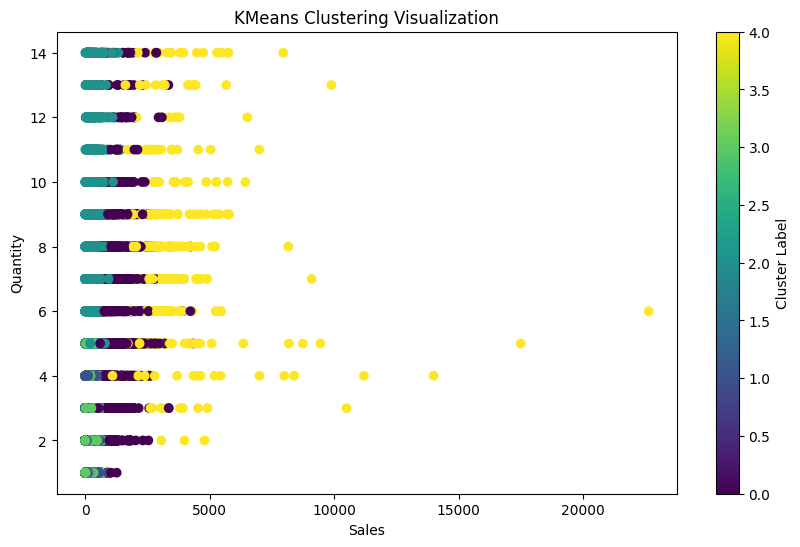

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data['Sales'], data['Quantity'], c=cluster_labels, cmap='viridis')
plt.title('KMeans Clustering Visualization')
plt.xlabel('Sales')
plt.ylabel('Quantity')
plt.colorbar(label='Cluster Label')
plt.show()



In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

# Assuming df0 is your DataFrame containing the data
selected_columns = ['Ship Mode', 'Customer ID', 'Segment', 'Product ID', 'Sales', 'Quantity', 'Order Priority']
data = df0[selected_columns]

# Drop any rows with missing values
data.dropna(inplace=True)

# Check for and remove duplicate rows
data.drop_duplicates(inplace=True)

# Reset the index of the DataFrame
data.reset_index(drop=True, inplace=True)

# Separate numeric and categorical features
numeric_features = ['Sales', 'Quantity']
categorical_features = ['Ship Mode', 'Customer ID', 'Segment', 'Product ID', 'Order Priority']

# Preprocess categorical features with one-hot encoding
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
onehot_encoded = onehot_encoder.fit_transform(data[categorical_features])

# Scale numerical features
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(data[numeric_features])






<ipython-input-37-224764ac58f9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
<ipython-input-37-224764ac58f9>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
import numpy as np

# Concatenate encoded categorical features and scaled numerical features
preprocessed_data = np.concatenate([onehot_encoded, scaled_numeric], axis=1)

# Create column names for the concatenated DataFrame
column_names = list(onehot_encoder.get_feature_names_out(categorical_features)) + numeric_features

# Convert the concatenated data into a DataFrame
preprocessed_data = pd.DataFrame(data=preprocessed_data, columns=column_names)


In [ ]:
preprocessed_data.shape

(51279, 21216)

In [ ]:
df0.head()

,Ship Mode,Customer ID,Customer Name,Segment,Product ID,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Label
0,Standard Class,CA-120551,Cathy Armstrong,Home Office,FUR-BO-4861,731.82,2,0.0,102.42,39.66,Medium,2017,1
1,Second Class,BD-116051,Brian Dahlen,Consumer,OFF-SU-2988,243.54,9,0.0,104.49,18.72,Medium,2015,2
2,Standard Class,CA-120551,Cathy Armstrong,Home Office,TEC-MA-4211,346.32,3,0.0,13.77,14.10,Medium,2017,1
3,Standard Class,CA-120551,Cathy Armstrong,Home Office,FUR-FU-5726,169.68,4,0.0,79.68,11.01,Medium,2017,1
4,Second Class,BD-116051,Brian Dahlen,Consumer,OFF-EN-3664,203.88,4,0.0,24.36,5.72,Medium,2015,1


In [ ]:
# Get the centroids of the clusters
centroids = kmeans_model['kmeans'].cluster_centers_

In [ ]:
centroids.shape

(5, 21213)

In [ ]:


# Check for missing values
print(df0.isnull().sum())

# Remove rows with missing values
df0.dropna(inplace=True)

# Check the shape of the data
print(df0.shape)

# Reset the index
df0.reset_index(drop=True, inplace=True)

# Check the data types of the columns
print(df0.dtypes)

# Perform the clustering operation again
kmeans_model.fit(df0)

# Get the cluster labels
cluster_labels = kmeans_model['kmeans'].labels_

# Add cluster labels to the df0 DataFrame as a new column 'Label'
df0['Label'] = cluster_labels

# Print the head of the df0 DataFrame to verify the results
df0.head()


Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Product ID        0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
Year              0
Label             0
dtype: int64
(52634, 13)
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
Product ID         object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
Year                int64
Label               int32
dtype: object


<ipython-input-43-c6466934184b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0.dropna(inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-43-c6466934184b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['Label'] = cluster_labels


,Ship Mode,Customer ID,Customer Name,Segment,Product ID,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Label
0,Standard Class,CA-120551,Cathy Armstrong,Home Office,FUR-BO-4861,731.82,2,0.0,102.42,39.66,Medium,2017,1
1,Second Class,BD-116051,Brian Dahlen,Consumer,OFF-SU-2988,243.54,9,0.0,104.49,18.72,Medium,2015,2
2,Standard Class,CA-120551,Cathy Armstrong,Home Office,TEC-MA-4211,346.32,3,0.0,13.77,14.10,Medium,2017,1
3,Standard Class,CA-120551,Cathy Armstrong,Home Office,FUR-FU-5726,169.68,4,0.0,79.68,11.01,Medium,2017,1
4,Second Class,BD-116051,Brian Dahlen,Consumer,OFF-EN-3664,203.88,4,0.0,24.36,5.72,Medium,2015,1


In [ ]:
# summarize the clusters by generating a new dataframe

# Get the cluster labels for each data point
cluster_labels = kmeans_model['kmeans'].labels_

# Create a new DataFrame with the original features and the cluster labels
cluster_df = df0.copy()
cluster_df['Cluster'] = cluster_labels

# Group the DataFrame by cluster and calculate the mean of each feature
cluster_summary = cluster_df.groupby('Cluster').mean()

# Print the cluster summary
cluster_summary


<ipython-input-44-0c1b218759fc>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = cluster_df.groupby('Cluster').mean()


,Sales,Quantity,Discount,Profit,Shipping Cost,Year,Label
Cluster,,,,,,,
0,1138.259440,4.974006,0.102147,151.478388,126.195748,2015.895243,0.0
1,125.992698,2.330035,0.146964,11.480472,9.370804,2015.897055,1.0
2,211.396242,6.747250,0.144302,18.144884,19.169832,2015.931532,2.0
3,112.712941,2.494743,0.144621,10.217287,16.170390,2015.878988,3.0
4,2955.174973,6.933022,0.083315,542.941460,383.514220,2015.890966,4.0


In [ ]:
# prompt: covert the information in the cluster summary in the dataframe into a string format so as to pass it into LLM to call

cluster_summary_str = cluster_summary.to_string()
print(cluster_summary_str)


               Sales  Quantity  Discount      Profit  Shipping Cost         Year  Label
Cluster                                                                                
0        1138.259440  4.974006  0.102147  151.478388     126.195748  2015.895243    0.0
1         125.992698  2.330035  0.146964   11.480472       9.370804  2015.897055    1.0
2         211.396242  6.747250  0.144302   18.144884      19.169832  2015.931532    2.0
3         112.712941  2.494743  0.144621   10.217287      16.170390  2015.878988    3.0
4        2955.174973  6.933022  0.083315  542.941460     383.514220  2015.890966    4.0


In [ ]:
!pip install openai==0.28


In [ ]:
# Cluster information
cluster_info = {
    '0': {'Sales': 1138.259440, 'Quantity': 4.974006, 'Discount': 0.102147, 'Profit': 151.478388, 'Shipping Cost': 126.195748, 'Year': 2015.89524, 'Label': 0.0},
    '1': {'Sales': 125.992698, 'Quantity': 2.330035, 'Discount': 0.146964, 'Profit': 11.480472, 'Shipping Cost': 9.370804, 'Year': 2015.897055, 'Label': 1.0},
    '2': {'Sales': 211.396242, 'Quantity': 6.747250, 'Discount': 0.144302, 'Profit': 18.144884, 'Shipping Cost': 19.169832, 'Year': 2015.931532, 'Label': 2.0},
    '3': {'Sales': 112.712941, 'Quantity': 2.494743, 'Discount': 0.144621, 'Profit': 10.217287, 'Shipping Cost': 16.170390, 'Year': 2015.878988, 'Label': 3.0},
    '4': {'Sales': 2955.174973, 'Quantity': 6.933022, 'Discount': 0.083315, 'Profit': 542.941460, 'Shipping Cost': 383.514220, 'Year': 2015.890966, 'Label': 4.0}
}


In [ ]:
# prompt: use the PaLM2 text-bison. max_output_tokens = 1024, temperature=0.4

import openai

openai.api_key = "YOUR_API_KEY"

prompt = f"""
You're a creative brand manager, given the following cluster information:

{cluster_info}, and the following cluster summary:

{cluster_summary_str}, come up with a brand persona, a catchy title, and next marketing action for each cluster.

For each Cluster:
Brand Persona:
Title:
Action:

"""

response = openai.Completion.create(
  engine="text-bison-001",
  prompt=prompt,
  max_output_tokens=1024,
  temperature=0.4
)

print(response.choices[0].text)
